In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# True if there are empty rows in the column
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# preprocessing
data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [7]:
# correlation
data[["Pclass", "Age", "SibSp", "Parch"]].corr()

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.369226,0.083081,0.018443
Age,-0.369226,1.000000,-0.308247,-0.189119
SibSp,0.083081,-0.308247,1.000000,0.414838
Parch,0.018443,-0.189119,0.414838,1.000000


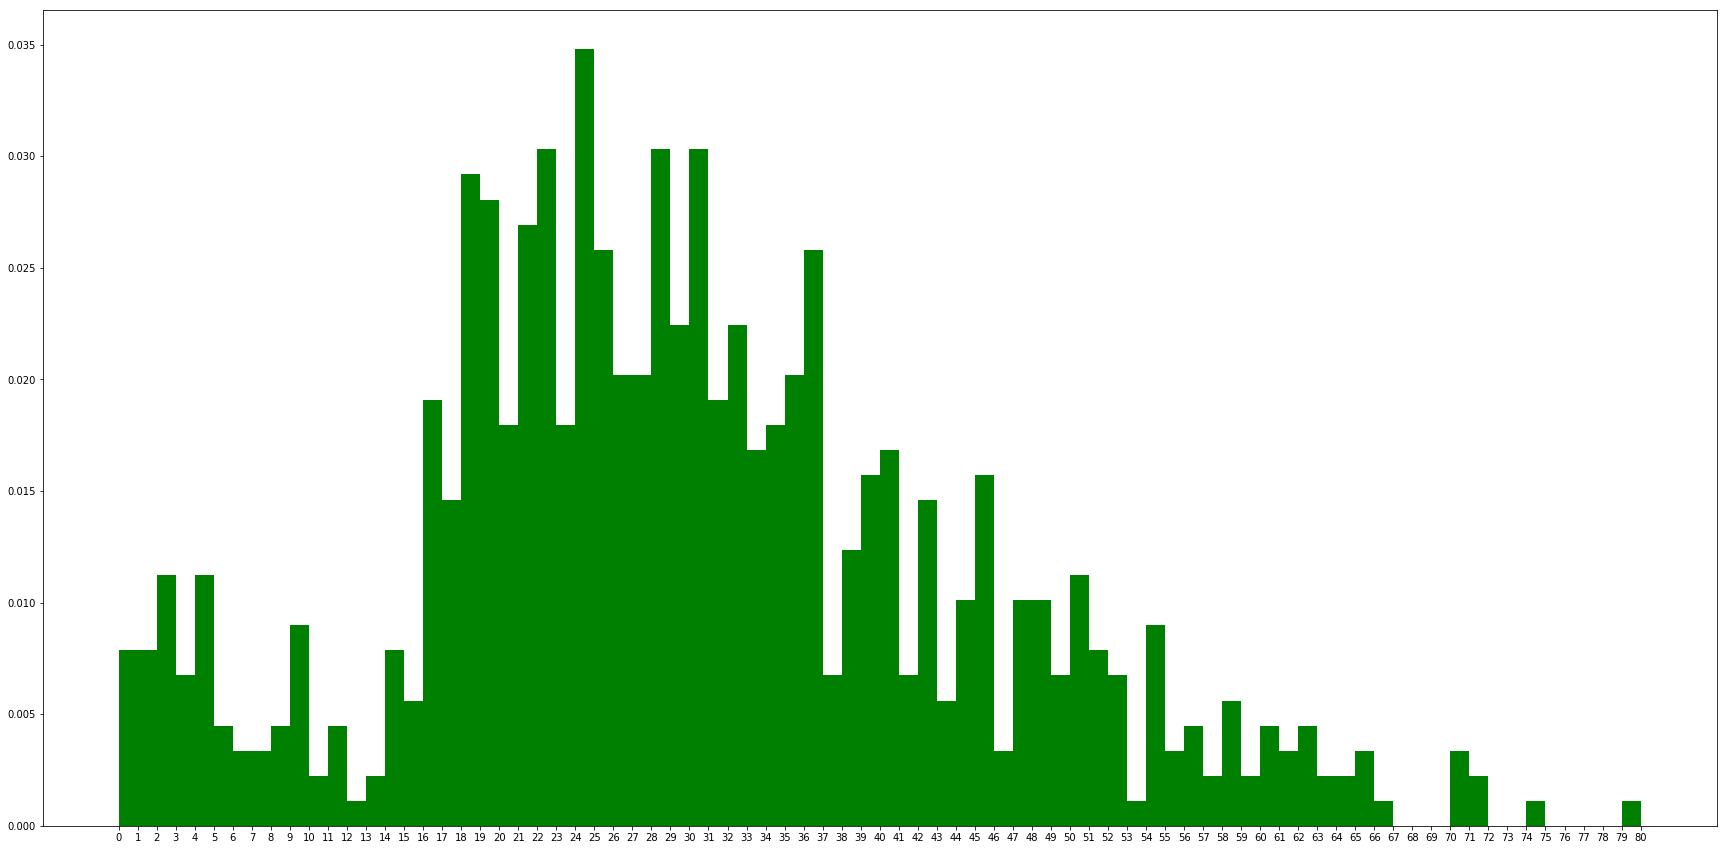

In [8]:
# histogram
max_age = int(max(data["Age"]))+1

plt.figure(figsize=(30,15))
weights = np.ones_like(data["Age"])/float(len(data["Age"]))
plt.hist(data["Age"], bins=range(0, max_age), weights=weights, color='g')
plt.xticks(range(0, max_age))
plt.show()

# Find the most popular female name

In [9]:
miss_names = data["Name"].apply(lambda x: x if x.find("Miss") != -1 else 0)
miss_names = miss_names[miss_names != 0].reset_index(drop=True)

In [10]:
def miss_name_func(x):
    if x.find(' ', (x.find("Miss")+6)) == -1:
        return x[(x.find("Miss")+6):]
    else:
        return x[(x.find("Miss")+6): (x.find(' ', (x.find("Miss")+6)))]

In [11]:
miss_names = miss_names.apply(lambda x: miss_name_func(x))

In [12]:
mrs_names = data["Name"].apply(lambda x: x if x.find("Mrs") != -1 else 0)
mrs_names = mrs_names[mrs_names != 0].reset_index(drop=True)

In [13]:
def mrs_name_func(x):
    return x[(x.find("(")+1): (x.find(' ', (x.find("(")+1)))]

In [14]:
mrs_names = mrs_names.apply(lambda x: mrs_name_func(x))

In [15]:
# The most popular name is Anna
pd.concat([mrs_names, miss_names], axis=0).value_counts()

Anna           15
Mary           14
Elizabeth      11
Margaret       10
Alice           6
Maria           5
Bertha          5
Helen           5
Ellen           4
Augusta         4
Emily           4
Ada             4
Catherine       4
Marie           4
Annie           4
Ida             3
Katherine       3
Edith           3
Hanora          3
"Mrs            3
Marion          3
Florence        3
Elisabeth       3
Kate            3
Amelia          3
Lillian         3
Jane            3
Madeleine       3
Rosa            2
Hedwig          2
               ..
Laina           1
Hilda           1
Banoura         1
Telma           1
Mantoura        1
Kristina        1
Daisy           1
Alma            1
Elise           1
Henriette       1
Elna            1
Elina           1
Osman,          1
Jeannie         1
Juliet          1
Masselmani,     1
Carla           1
Velin           1
Marian          1
Margareth       1
Selini          1
Miriam          1
Joan            1
Emma            1
Ruth      

In [16]:
# The task about tracks
data[(data["Sex"]=="female") & (data["Age"]>30)].groupby("Embarked").count()["PassengerId"]

Embarked
C    24
Q     4
S    73
Name: PassengerId, dtype: int64

In [17]:
# mean age
data[data["Embarked"] == "C"]["Age"].mean()

30.81476923076923

In [18]:
# median age
data[data["Embarked"] == "C"]["Age"].median()

29.0